In [243]:
import json
import numpy as np

keypoints = [
    "Point_0", "Point_7", "Point_8", "Point_11", "Point_12", "Point_13",
    "Point_14", "Point_15", "Point_16", "Point_17", "Point_18", "Point_21",
    "Point_22","Point_23", "Point_24", "Point_25", "Point_26", "Point_27",
    "Point_28", "Point_29", "Point_30"
]


# JSON 데이터 로드 함수
def load_json_skeleton_view1(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    num_frames = len(data["frames"])
    num_joints = len(keypoints)
    num_features = 2  # (x, y)
    num_views = 1     

    # ✅ (1, 프레임, 뷰, 관절, 좌표) 형태로 데이터 배열 생성
    X_data = np.zeros((1, num_frames, num_views, num_joints, num_features), dtype=np.float32)

    views = ["view1"]

    # ✅ JSON 데이터 -> 배열 변환
    for frame_idx, frame in enumerate(data["frames"]):
        for view_idx, view in enumerate(views):
            pts = frame.get(view, {}).get("pts", {})
            for joint_idx, joint_name in enumerate(keypoints):
                if joint_name in pts:
                    X_data[0, frame_idx, view_idx, joint_idx, 0] = pts[joint_name]["x"]
                    X_data[0, frame_idx, view_idx, joint_idx, 1] = pts[joint_name]["y"]

    return X_data, data.get("type_info", None)

In [244]:
# ✅ JSON 데이터 로드 함수 (5개 각도 전처리)
def load_json_skeleton(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    num_frames = len(data["frames"])
    num_joints = len(keypoints)
    num_features = 2  # (x, y)
    num_views = 2

    # ✅ (1, 프레임, 뷰, 관절, 좌표) 형태로 데이터 배열 생성
    X_data = np.zeros((1, num_frames, num_views, num_joints, num_features), dtype=np.float32)

    views = ["view1", "view3"]

    # ✅ JSON 데이터 -> 배열 변환
    for frame_idx, frame in enumerate(data["frames"]):
        for view_idx, view in enumerate(views):
            pts = frame.get(view, {}).get("pts", {})
            for joint_idx, joint_name in enumerate(keypoints):
                if joint_name in pts:
                    X_data[0, frame_idx, view_idx, joint_idx, 0] = pts[joint_name]["x"]
                    X_data[0, frame_idx, view_idx, joint_idx, 1] = pts[joint_name]["y"]

    return X_data, data.get("type_info", None)

# ✅ 여러 개의 JSON 파일을 한 번에 로드하는 함수 (올바른/잘못된 데이터 포함)
def load_labeled_json_skeleton(file_paths, labels):
    X_data_list = []
    y_data_list = []

    for file_path, label in zip(file_paths, labels):
        X, _ = load_json_skeleton(file_path)
        X_data_list.append(X)
        y_data_list.append(label)

    # ✅ 여러 개의 파일을 하나의 NumPy 배열로 병합
    X_train = np.concatenate(X_data_list, axis=0)  # (batch_size, frames, views, joints, features)
    y_train = np.array(y_data_list)                # (batch_size, )

    return X_train, y_train
    
# ✅ 올바른 자세와 잘못된 자세 데이터를 함께 로드
file_paths = [
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body08-1-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body08-2-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body08-3-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body08-4-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body08-5-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body08-6-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body08-7-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-2-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-3-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-4-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-5-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-6-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-7-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body10-1-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body10-2-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body10-3-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body10-4-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body10-5-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body10-6-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body10-7-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body11-1-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body11-2-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body11-3-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body11-4-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body11-5-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body11-6-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body11-7-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body12-1-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body12-2-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body12-3-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body12-4-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body12-5-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body12-6-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body12-7-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body17-1-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body17-2-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body17-3-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body17-4-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body17-5-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-562.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-563.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-564.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-565.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-566.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-567.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-568.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-569.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-570.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-571.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-572.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-573.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-574.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-575.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-576.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-577.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-578.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-579.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-580.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-581.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-582.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-583.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-584.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-585.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-586.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-587.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-588.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-589.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-590.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-591.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body09-1-592.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body08-1-562.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body08-1-563.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body08-1-564.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body08-1-565.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body08-1-566.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body08-1-567.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body08-1-568.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body08-1-569.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/body08-1-570.json",
]

labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  # 0 = 올바른 자세, 1 = 잘못된 자세
    
# ✅ 올바른 자세와 잘못된 자세 데이터를 함께 로드
file_paths_val = [
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-1-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-2-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-3-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-4-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-5-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-6-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-7-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-1-562.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-1-563.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-1-564.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-1-565.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-1-566.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-1-567.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-1-568.json"
]

labels_val = [0, 0, 0, 0, 0, 0, 0,
         1, 1, 1, 1, 1, 1, 1]  # 0 = 올바른 자세, 1 = 잘못된 자세


# ✅ 전처리 실행
X_train, y_train = load_labeled_json_skeleton(file_paths, labels)
X_val, y_val = load_labeled_json_skeleton(file_paths_val, labels_val)
# ✅ 전처리된 데이터 형태 확인
print("전처리된 데이터 Shape:", X_train.shape)
print("전처리된 데이터 Shape:", X_val.shape)

전처리된 데이터 Shape: (80, 32, 2, 21, 2)
전처리된 데이터 Shape: (14, 32, 2, 21, 2)


In [245]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.metrics import Precision, Recall
import mediapipe as mp
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau


def jitter_data(data, noise_level=0.02):
    noise = np.random.normal(loc=0.0, scale=noise_level, size=data.shape)
    return data + noise

# ✅ Scaling (데이터 크기 변형)
def scale_data(data, scale_range=(0.9, 1.1)):
    scale = np.random.uniform(scale_range[0], scale_range[1], size=(data.shape[0], 1, 1, 1, 1))
    return data * scale  # ✅ 차원을 맞춰서 곱하기!

def rotate_skeleton(data, angle_range=(-10, 10)):
    angle = np.random.uniform(angle_range[0], angle_range[1]) * np.pi / 180  # 라디안 변환
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    return np.dot(data, rotation_matrix)

# ✅ 인접 행렬 정규화 함수: self-loop 추가 및 D^(-1/2) A D^(-1/2) 적용
def normalize_adjacency_matrix(adj):
    # 자기 루프 추가
    np.fill_diagonal(adj, 1)
    # Degree matrix 계산
    degree = np.sum(adj, axis=1)
    # 0 나누기 방지
    degree[degree == 0] = 1
    D_inv_sqrt = np.diag(1.0 / np.sqrt(degree))
    # 정규화된 인접 행렬 계산: D^(-1/2) A D^(-1/2)
    A_norm = D_inv_sqrt @ adj @ D_inv_sqrt
    return A_norm
    
# ✅ 그래프 컨볼루션 레이어 정의
class GraphConvLayer(layers.Layer):
    def __init__(self, units, adjacency_matrix):
        super(GraphConvLayer, self).__init__()
        self.units = units
        self.adjacency_matrix = tf.Variable(adjacency_matrix, dtype=tf.float32, trainable=False)
        self.batch_norm = layers.BatchNormalization()  # 배치 정규화 추가

    def build(self, input_shape):
        # input_shape: (batch*frames, joints, features)
        self.kernel = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="glorot_uniform",
            trainable=True
        )

    def call(self, inputs):
        # inputs: (batch*frames, joints, features)
        x = tf.linalg.matmul(self.adjacency_matrix, inputs)  # Graph convolution
        x = tf.linalg.matmul(x, self.kernel)  # Apply learnable weights
        x = self.batch_norm(x)  # Batch normalization
        x = tf.nn.leaky_relu(x)  # Activation function applied AFTER batch norm
        return x

# ✅ ST-GCN 모델 정의
class STGCN(tf.keras.Model):
    def __init__(self, num_joints, num_features, adjacency_matrix, num_classes):
        super(STGCN, self).__init__()
        
        self.graph_conv1 = GraphConvLayer(64, adjacency_matrix)
        self.graph_conv2 = GraphConvLayer(128, adjacency_matrix)
        self.graph_conv3 = GraphConvLayer(256, adjacency_matrix)  # 추가된 Graph Conv
        self.graph_conv4 = GraphConvLayer(512, adjacency_matrix)  # 추가된 Graph Conv
        
        self.temporal_conv1 = layers.Conv1D(512, kernel_size=7, padding="same")
        self.temporal_conv2 = layers.Conv1D(256, kernel_size=7, padding="same")
        self.temporal_conv3 = layers.Conv1D(128, kernel_size=5, padding="same")
        self.temporal_conv4 = layers.Conv1D(64, kernel_size=3, padding="same")
        
        self.batch_norm1 = layers.BatchNormalization()
        self.batch_norm2 = layers.BatchNormalization()
        self.batch_norm3 = layers.BatchNormalization()
        self.batch_norm4 = layers.BatchNormalization()
        
        self.activation = layers.Activation("relu")
        self.global_pool = layers.GlobalAveragePooling1D()
        self.fc = layers.Dense(num_classes, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.05))
        self.dropout = layers.Dropout(0.5) 

    def build(self, input_shape):
        super().build(input_shape)

    def call(self, inputs):
        # ✅ 입력 처리: (batch, frames, views, joints, features)
        if len(inputs.shape) == 5:
            # 여러 각도(View) 데이터가 있는 경우 평균 내기
            inputs = tf.reduce_mean(inputs, axis=2)  # (batch, frames, joints, features)
        
        batch_size = tf.shape(inputs)[0]
        frames = tf.shape(inputs)[1]
        joints = tf.shape(inputs)[2]
        features = tf.shape(inputs)[3]
        x = tf.reshape(inputs, (batch_size * frames, joints, features))  # (batch * joints, frames, features)
        
        # ✅ 모델 처리
        x = self.graph_conv1(x)
        x = self.batch_norm1(x)
        x = self.activation(x)
        
        x = self.graph_conv2(x)
        x = self.batch_norm2(x)
        x = self.activation(x)

        x = self.graph_conv3(x)
        x = self.batch_norm3(x)
        x = self.activation(x)

        x = self.graph_conv4(x)
        x = self.batch_norm4(x)
        x = self.activation(x)

        # Temporal Conv를 위해 프레임별로 모든 관절의 정보를 하나의 벡터로 결합
        out_features = tf.shape(x)[-1]
        x = tf.reshape(x, (batch_size, frames, joints * out_features))

        x = self.temporal_conv1(x)
        x = self.temporal_conv2(x)
        x = self.temporal_conv3(x)
        x = self.temporal_conv4(x)

        # frames 차원을 평균 내어 최종 특징 벡터 생성
        x = self.global_pool(x)
        x = self.dropout(x)
        
        return self.fc(x)

# Mediapipe에서 제공하는 POSE_CONNECTIONS을 활용
mp_pose = mp.solutions.pose
connections = list(mp_pose.POSE_CONNECTIONS)

# ✅ 현재 선택된 19개 관절 인덱스 (사용자가 선택한 관절 리스트)
selected_joints = [0, 2, 5, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 21, 23, 25, 26, 28, 30, 31, 32]

# ✅ 원본 33개 관절을 기반으로 한 인접 행렬 생성
full_adjacency_matrix = np.zeros((33, 33))  # 전체 33개 관절을 사용한 경우
for joint1, joint2 in connections:
    full_adjacency_matrix[joint1, joint2] = 1
    full_adjacency_matrix[joint2, joint1] = 1  # 대칭 관계

# ✅ 선택된 관절만을 포함하는 인접 행렬 생성
num_joints = len(selected_joints)
adjacency_matrix = np.zeros((num_joints, num_joints))

for i, joint1 in enumerate(selected_joints):
    for j, joint2 in enumerate(selected_joints):
        adjacency_matrix[i, j] = full_adjacency_matrix[joint1, joint2]  # 기존 인접 행렬에서 추출

# 인접 행렬 정규화 (자기 루프 추가 및 정규화)
adjacency_matrix_norm = normalize_adjacency_matrix(adjacency_matrix)
print(f"Normalized adjacency matrix shape: {adjacency_matrix_norm.shape}")

num_features = 2
num_classes = 2  # (올바른 자세 / 잘못된 자세)

# ✅ ST-GCN 모델 생성 및 컴파일
del stgcn_model
stgcn_model = STGCN(num_joints, num_features, adjacency_matrix_norm, num_classes)

lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=0.001,
    decay_steps=6000,
    alpha=0.001
)

stgcn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule, clipnorm=5.0), 
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# 2️⃣ Train 데이터에만 데이터 증강 적용
X_train_augmented = jitter_data(X_train)
X_train_augmented = scale_data(X_train_augmented)
X_train_augmented = rotate_skeleton(X_train_augmented)

# 3️⃣ 원본 데이터 + 증강 데이터 함께 사용
X_train = np.concatenate([X_train, X_train_augmented])
y_train = np.concatenate([y_train, y_train])  # 증강된 데이터는 같은 레이블 사용

# Ensure y_val is also categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=2)

early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# ✅ 클래스 비율 확인
unique, counts = np.unique(y_train, return_counts=True)
print(f"📊 클래스별 샘플 개수: {dict(zip(unique, counts))}")

# ✅ 정규화된 값 확인
print(f"X_train min after scaling: {np.min(X_train)}")
print(f"X_train max after scaling: {np.max(X_train)}")
print(f"X_train mean after scaling: {np.mean(X_train)}")
print(f"X_train std after scaling: {np.std(X_train)}")

# ✅ Train the model
history = stgcn_model.fit(
    X_train, y_train, 
    epochs=400, batch_size=80, verbose=1, 
    validation_data=(X_val, y_val), 
    callbacks=[early_stopping]
)

Normalized adjacency matrix shape: (21, 21)
📊 클래스별 샘플 개수: {0.0: 160, 1.0: 160}
X_train min after scaling: -0.08650322726822991
X_train max after scaling: 0.8896129866928256
X_train mean after scaling: 0.5399663449367682
X_train std after scaling: 0.11421471639907631
Epoch 1/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.4750 - loss: 5.7230 - val_accuracy: 0.5000 - val_loss: 31.7417
Epoch 2/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.4708 - loss: 24.9409 - val_accuracy: 0.5000 - val_loss: 4.8294
Epoch 3/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.4625 - loss: 3.9061 - val_accuracy: 0.5000 - val_loss: 1.0054
Epoch 4/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.4625 - loss: 0.9816 - val_accuracy: 0.5000 - val_loss: 0.8778
Epoch 5/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.4625 - loss: 0.8952 - val_accuracy: 0.5000 - val_loss: 0.8734
Epoch 6/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.4875 - loss: 0.8991 - val_accuracy: 0.5000 - val

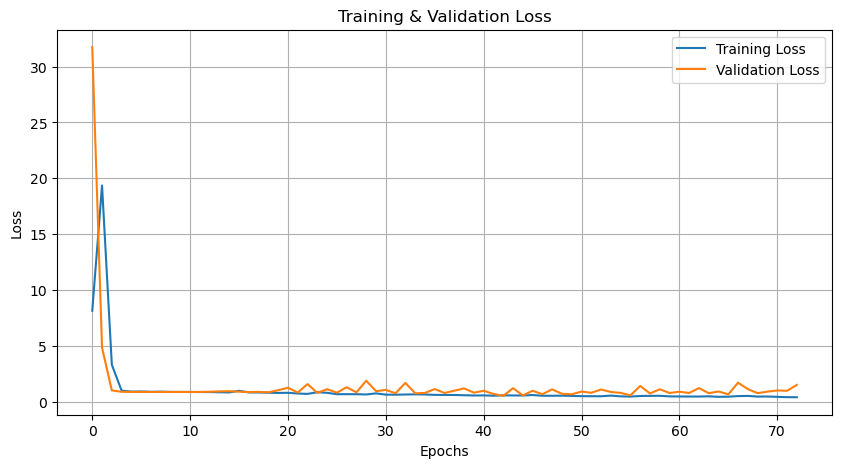

In [246]:
import matplotlib.pyplot as plt

# ✅ Loss 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [257]:
def predict_multiple_json_skeleton(file_paths):
    results = {}

    for file_path in file_paths:
        try:
            # ✅ JSON 데이터 로드
            X_data, _ = load_json_skeleton(file_path)

            # ✅ 모델 예측
            prediction = stgcn_model.predict(X_data)
            
            # ✅ 예측 결과 처리
            predicted_class = np.argmax(prediction, axis=-1)[0]
            confidence = prediction[0][predicted_class]

            # ✅ 결과 저장
            if predicted_class == 0:
                results[file_path] = f"✅ 올바른 자세 ({confidence * 100:.2f}% 확신)"
            else:
                results[file_path] = f"❌ 잘못된 자세 감지 ({confidence * 100:.2f}% 확신)"

        except Exception as e:
            results[file_path] = f"❌ 예측 실패 (오류: {e})"

    return results



# ✅ 여러 개의 JSON 파일 리스트
file_paths = [
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-1-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-2-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-3-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-4-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-5-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-6-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-7-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-1-562.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-1-563.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-1-564.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-1-565.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-1-566.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-1-567.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-1-568.json"
]

# ✅ 예측 결과 얻기
prediction_results = predict_multiple_json_skeleton(file_paths)

# ✅ 결과 출력
for file, result in prediction_results.items():
    print(f"{file}: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-1-561.json: ✅ 올바른 자세 (73.32% 확신)
D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-2-561.json: ✅ 올바른 자세 (87.01% 확신)
D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-3-561.json: ❌ 잘못된 자세 감지 (54.11% 확신)
D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-4-561.json: ✅ 올바른 자세 (85.67% 확신)
D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/body_v-5-561.json: ✅ 올바른 자세 (95.27% 확신)
D:/Studying/gradu/013.피트니

In [259]:
stgcn_model.save("stgcn_model2.keras")

In [249]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

class PushUpPostureAnalyzer:
    def __init__(self, model):
        """
        ST-GCN 모델을 활용한 푸쉬업 자세 분석기.
        """
        self.model = model
        self.joint_indices = {
            "head": 0,  # 머리 (코)
            "upper_back": 11,  # 어깨 (왼쪽)
            "lower_back": 23,  # 골반 (왼쪽)
            "shoulder": 11,  # 어깨 (왼쪽)
            "elbow": 13,  # 팔꿈치 (왼쪽)
            "wrist": 15,  # 손목 (왼쪽)
            "left_wrist": 15,
            "right_wrist": 16,
            "left_elbow": 13,
            "right_elbow": 14,
            "left_hip": 23,
            "right_hip": 24,
            "left_knee": 25,
            "right_knee": 26,
            "left_ankle": 27,
            "right_ankle": 28,
            "chest": 11  # 가슴 (왼쪽 어깨로 대체)
        }
    
    def detect_faulty_posture(self, skeleton_sequence):
        """푸쉬업 동작을 분석하고 잘못된 자세를 감지합니다."""
        predictions = self.model.predict(np.expand_dims(skeleton_sequence, axis=0))
        predicted_label = np.argmax(predictions)
        faults = {}
        
        if predicted_label == 1:  # 잘못된 자세로 분류된 경우
            faults["척추"] = self.check_neutral_spine(skeleton_sequence)
            faults["팔꿈치"] = self.check_elbow_angle(skeleton_sequence)
            faults["가슴"] = self.check_chest_movement(skeleton_sequence)
            faults["손 위치"] = self.check_hand_position(skeleton_sequence)
            faults["머리 정렬"] = self.check_head_alignment(skeleton_sequence)
        
        return {k: v for k, v in faults.items() if v is not None}
    
    def check_neutral_spine(self, skeleton_sequence):
        """척추가 중립적인 상태를 유지하는지 확인합니다."""
        spine_joints = [self.joint_indices['upper_back'], self.joint_indices['lower_back']]
        spine_angles = self.calculate_joint_angle(skeleton_sequence, spine_joints)
        
        if np.any(np.abs(spine_angles - 180) > 15):
            return "척추가 중립적이지 않습니다. 허리를 곧게 펴세요."
        return None
    
    def check_elbow_angle(self, skeleton_sequence):
        """팔꿈치가 최저점에서 90도를 이루는지 확인합니다."""
        elbow_joints = [self.joint_indices['shoulder'], self.joint_indices['elbow'], self.joint_indices['wrist']]
        elbow_angles = self.calculate_joint_angle(skeleton_sequence, elbow_joints)
        
        if np.min(elbow_angles) > 100:
            return "팔꿈치가 충분히 구부러지지 않았습니다. 90도까지 구부리세요."
        return None
    
    def check_chest_movement(self, skeleton_sequence):
        """가슴이 충분히 아래로 내려가는지 확인합니다."""
        chest_index = self.joint_indices['chest']
        movement_range = np.max(skeleton_sequence[:, chest_index, 1]) - np.min(skeleton_sequence[:, chest_index, 1])
        
        if movement_range < 0.2:
            return "가슴이 충분히 내려가지 않았습니다. 몸을 더 낮추세요."
        return None
    
    def check_hand_position(self, skeleton_sequence):
        """손의 위치가 가슴과 일직선상에 있는지 확인합니다."""
        wrist_indices = [self.joint_indices['left_wrist'], self.joint_indices['right_wrist']]
        chest_index = self.joint_indices['chest']
        
        hand_positions = skeleton_sequence[:, wrist_indices, 0]
        chest_position = skeleton_sequence[:, chest_index, 0]
        
        if np.any(np.abs(hand_positions - chest_position) > 0.2):
            return "손이 가슴과 정렬되지 않았습니다. 손의 위치를 조정하세요."
        return None
    
    def check_head_alignment(self, skeleton_sequence):
        """머리가 바르게 정렬되어 있는지 확인합니다."""
        head_index = self.joint_indices['head']
        neck_index = self.joint_indices['upper_back']
        
        head_movement = np.abs(skeleton_sequence[:, head_index, 1] - skeleton_sequence[:, neck_index, 1])
        if np.any(head_movement > 0.1):
            return "머리 위치가 올바르지 않습니다. 머리를 중립적으로 유지하세요."
        return None
    
    def calculate_joint_angle(self, skeleton_sequence, joint_indices):
        """세 개의 관절을 이용해 각도를 계산합니다."""
        a, b, c = [skeleton_sequence[:, idx, :] for idx in joint_indices]
        
        ab = a - b
        bc = c - b
        
        ab_norm = np.linalg.norm(ab, axis=1)
        bc_norm = np.linalg.norm(bc, axis=1)
        dot_product = np.sum(ab * bc, axis=1)
        
        angles = np.arccos(dot_product / (ab_norm * bc_norm)) * (180 / np.pi)
        return angles
    
    def provide_feedback(self, skeleton_sequence):
        """감지된 자세 오류를 기반으로 실시간 피드백을 제공합니다."""
        faults = self.detect_faulty_posture(skeleton_sequence)
        
        if not faults:
            return "훌륭합니다! 푸쉬업 자세가 올바릅니다."
        
        feedback = "다음 사항을 수정하세요: "
        for key, message in faults.items():
            feedback += f"\n- {message}"
        
        return feedback
